### Problem 1

$Y = f(X) + U\\
E[U|X] = 0 \\
E[U^2|X] = \sigma^2$


Show that 

$MSE(\hat f | X^*) := E[(\hat f(X^*) - Y^*)^2| X^*]$

can be decomposed into.


$MSE(\hat f | X^*) = E[(\hat f(X^*) - E[\hat f(X^*)| X^*])^2| X^*] + (E[\hat f(X^*)| X^*] - f(X^*))^2  + \sigma^2 $

First, we know that:

$= E[(\hat f(X^*) - Y^*)^2| X^*] \implies E[((\hat f(X^*) - f(X^*)) + U^*)^2| X^*]$

$= E[(\hat f(X^*) - f(X^*))^2| X^*] + E[(U^*)^2| X^*] + 2E[(\hat f(X^*) - f(X^*))U^*| X^*]$

$E[(\hat f(X^*) - f(X^*))U^*| X^*] = 0$ thus:

$= E[(\hat f(X^*) - f(X^*))^2| X^*] + \sigma^2$


when we $\pm E[\hat f(X^*)| X^*]$ to the first term, we get

$= E[((\hat f(X^*) - E[\hat f(X^*)| X^*]) + (E[\hat f(X^*)| X^*] - f(X^*)))^2| X^*] + \sigma^2$

$= E[(\hat f(X^*) - E[\hat f(X^*)| X^*])^2 + (E[\hat f(X^*)| X^*] - f(X^*))^2$
$+ 2(\hat f(X^*) - E[\hat f(X^*)| X^*])(E[\hat f(X^*)| X^*] - f(X^*)) | X^*]+ \sigma^2$

$= E[(\hat f(X^*) -  E[\hat f(X^*)| X^*])^2| X^*] + E[( E[\hat f(X^*)| X^*] - f(X^*))^2| X^*]$
$+ 2E[(\hat f(X^*) - E[\hat f(X^*)| X^*])(E[\hat f(X^*)| X^*] - f(X^*)) | X^*]+ \sigma^2$

$= E[(\hat f(X^*) - E[\hat f(X^*)| X^*])^2| X^*] + (E[\hat f(X^*)| X^*] - f(X^*))^2$

$+ 2(E[\hat f(X^*)| X^*] - f(X^*)) E[(\hat f(X^*) - E[\hat f(X^*)| X^*]| X^*]+ \sigma^2$

simplifying the third term:

$2(E[\hat f(X^*)| X^*] - f(X^*)) E[(\hat f(X^*) - E[\hat f(X^*)| X^*]| X^*]$

$\implies 2(E[\hat f(X^*)| X^*] - f(X^*)) (E[\hat f(X^*) | X^*] - E[\hat f(X^*)| X^*])$

since $E[(\hat f(X^*) | X^*] - E[\hat f(X^*)| X^*] = 0$, the term third is 0 leaving us with:

$= E[(\hat f(X^*) - E[\hat f(X^*)| X^*])^2| X^*] + (E[\hat f(X^*)| X^*] - f(X^*))^2  + \sigma^2 ///$

**Problem 1: part 2**

In [279]:
import numpy as np #for matrixes
import math 
import matplotlib.pyplot as plt #for plotting
from sklearn.linear_model import LinearRegression
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [280]:
#a
np.random.seed(65211)

#create "true f(x)"
x_values = np.linspace(0, 2 * np.pi, 300)

# Calculate f(x) = sin(x)
f_x = np.sin(x_values)


X_vec = np.random.uniform(0, 2*np.pi, size=30)
Y_vec = np.random.normal(np.sin(X), 0.2, size=30)

print(X_vec, Y_vec)

[4.93247475 4.86945915 2.47262067 0.26028025 3.10835807 5.23732458
 2.31204273 5.55431808 1.07381274 5.3788515  0.17191582 1.97494181
 4.08068639 2.27687508 2.32049142 0.22215632 1.14070405 2.8476873
 4.84945827 4.18113    3.90237511 1.72724692 3.08457644 4.17779842
 3.39683906 4.15490229 4.57111    4.9136611  0.20435054 1.84369289] [-0.24020624  0.8557268  -0.5426165  -0.65081052 -0.8309233   0.00620705
 -0.61983897 -0.67851468 -0.45509092 -0.8481064   0.51298225 -0.19995107
  1.10183902 -0.35493945  0.49777488  0.56092525 -1.40462016 -0.97181998
 -0.76651806  0.54813158 -1.0561495   1.63330198  1.0022593   0.92769483
 -0.52096956  0.45305659 -0.87359675 -0.28425001  0.98015969  1.10476454]


Text(0, 0.5, 'y')

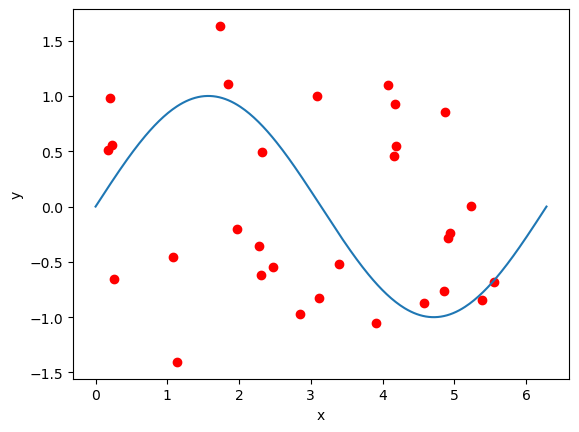

In [281]:
# PART B
fig = plt.figure()
plt.scatter(X_vec, Y_vec, c = 'red')
plt.plot(x_values, f_x) #sin(x), blue line
plt.xlabel('x')
plt.ylabel('y')

**PART Ci**

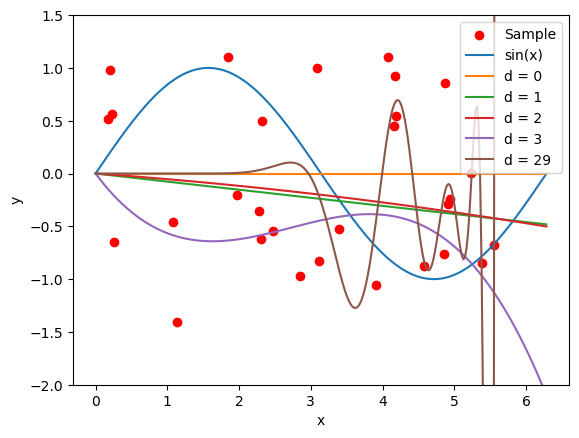

In [282]:
# PART Ci
#function to make a + bx^2 + cX^3
def poly_fuc(x, coefficients):
    # Assuming coefficients is an array containing the coefficients for each term in the polynomial
    # The first element is the intercept, the rest are coefficients for x^1, x^2, ..., x^d
    degree = len(coefficients)
    
    # Create the polynomial features for the input x
    X_poly = np.array([x**i for i in range(degree)])

    # Calculate the predicted y using the coefficients
    y_pred = np.dot(coefficients, X_poly)
    
    return y_pred


def poly_reg(x_values, d):
    # Create polynomial features (transforms x to x^0, x^1 ,.., x^d)
    poly = PolynomialFeatures(degree = d)
    
    # .reshape(-1, 1)transforms to a 2D array
    # -1 means any number of rows, 1 means column, so this is a column vector
    # fit_transform does the transformtion on the column vector
    X_poly = poly.fit_transform(X_vec.reshape(-1, 1))
    
    # Fit linear regression model
    model = LinearRegression().fit(X_poly, Y_vec)
    
    # save the coefficients 
    coefficients = model.coef_
    #make the estimated f D
    f_d = poly_fuc(x_values, coefficients)
    return f_d

fig = plt.figure()
plt.scatter(X_vec, Y_vec, c = 'red', label='Sample')
plt.plot(x_values, f_x, label='sin(x)') 
plt.plot(x_values, poly_reg(x_values, 0), label='d = 0')
plt.plot(x_values, poly_reg(x_values, 1), label='d = 1')
plt.plot(x_values, poly_reg(x_values, 2), label='d = 2')
plt.plot(x_values, poly_reg(x_values, 3), label='d = 3')
plt.plot(x_values, poly_reg(x_values, 29),label='d = 29')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 1.5)
plt.legend()  # Add legends based on the provided labels
plt.show()  


#fig = plt.figure()

**PART C II**

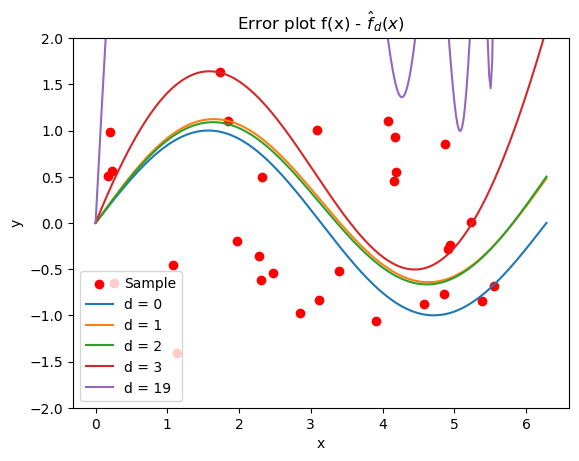

In [284]:
fig = plt.figure()
plt.scatter(X_vec, Y_vec, c = 'red', label = 'Sample')
#plt.plot(x_values, f_x, label='sin(x)') 
plt.plot(x_values, f_x - poly_reg(x_values, 0), label='d = 0')
plt.plot(x_values, f_x - poly_reg(x_values, 1), label='d = 1')
plt.plot(x_values, f_x - poly_reg(x_values, 2), label='d = 2')
plt.plot(x_values, f_x - poly_reg(x_values, 3), label='d = 3')
plt.plot(x_values, f_x - poly_reg(x_values, 19),label='d = 19')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 2)
plt.legend()  # Add legends based on the provided labels
plt.title('Error plot f(x) - $\hat f_d(x)$')
plt.show()  


 **PART C III**

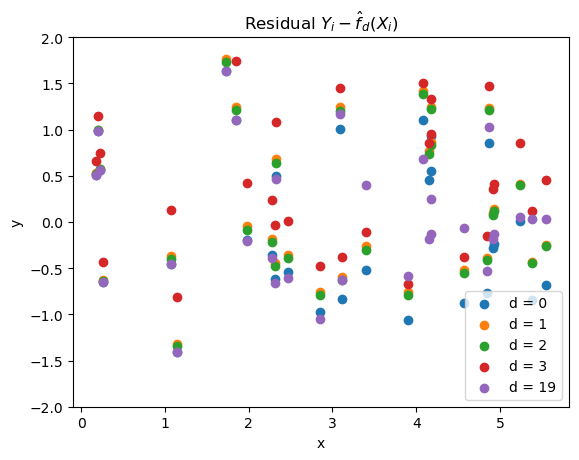

In [285]:
fig = plt.figure()

plt.scatter(X_vec, Y_vec - poly_reg(X_vec, 0), label='d = 0')

plt.scatter(X_vec, Y_vec - poly_reg(X_vec, 1), label='d = 1')

plt.scatter(X_vec, Y_vec - poly_reg(X_vec, 2), label='d = 2')

plt.scatter(X_vec, Y_vec - poly_reg(X_vec, 3), label='d = 3')

plt.scatter(X_vec, Y_vec - poly_reg(X_vec, 29),label='d = 19')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 2)
plt.legend()  # Add legends based on the provided labels
plt.title('Residual $Y_i - \hat f_d(X_i)$')
plt.show()  

**Part D**

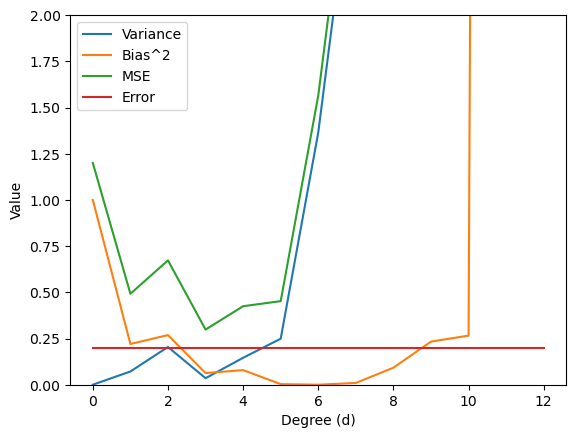

In [286]:
def poly_fuc(x, coefficients):
    # Assuming coefficients is an array containing the coefficients for each term in the polynomial
    # The first element is the intercept, the rest are coefficients for x^1, x^2, ..., x^d
    degree = len(coefficients)
    
    # Create the polynomial features for the input x
    X_poly = np.array([x**i for i in range(degree)])

    # Calculate the predicted y using the coefficients
    y_pred = np.dot(coefficients, X_poly)
    
    return y_pred


def poly_reg(x_values, d):
    # Create polynomial features (transforms x to x^0, x^1 ,.., x^d)
    poly = PolynomialFeatures(degree = d)
    
    # .reshape(-1, 1)transforms to a 2D array
    # -1 means any number of rows, 1 means column, so this is a column vector
    # fit_transform does the transformtion on the column vector
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Fit linear regression model
    model = LinearRegression().fit(X_poly, Y)
    
    # save the coefficients 
    coefficients = model.coef_
    #make the estimated f D
    f_d = poly_fuc(x_values, coefficients)
    return f_d


degree = range(0, 13)
n = 1000
x_test = 1.5*np.pi
f_test = np.sin(x_test)

d_var = []
d_bias = []
d_mse = []
error = 0.2
for d in degree:
    f_hat_test = []
    for i in range(n): #1000 times
        #get a random 30 points
        X = np.random.uniform(0, 2*np.pi, size=30)
        Y = np.random.normal(np.sin(X), 0.2, size=30)
        poly = PolynomialFeatures(degree = d)
        X_poly = poly.fit_transform(X.reshape(-1, 1))
        
        # Fit linear regression model 
        model = LinearRegression().fit(X_poly, Y)
        
        # save coefficients
        coefficients = model.coef_
        
        #y hat
        y_test_pred = poly_fuc(x_test, coefficients)
        f_hat_test.append(y_test_pred)
    var = np.mean((f_hat_test - np.mean(f_hat_test))**2)
    bias = (np.mean(f_hat_test) - f_test)**2
    mse = var + bias + error
    d_var.append(var)
    d_bias.append(bias)
    d_mse.append(mse)
    
fig, ax = plt.subplots()
ax.plot(degree, d_var, label="Variance")
ax.plot(degree, d_bias, label="Bias^2")
ax.plot(degree, d_mse, label="MSE")
ax.plot(degree, [error] * len(degree), label="Error")
ax.set_xlabel('Degree (d)')
ax.set_ylabel('Value')
ax.legend()
ax.set_ylim(0, 2)
plt.show()


**PART E**

From about d < 4, we see that the model is underfitted due to high bias and low variance. Then from about 4 to 8 we see a switch with high variance and low bias, indicating overfitting. From about 8, both the bias and variance increase??

**Problem 1 part 3**

Breiman would think there are better ways to model this and would not do this exercise

## Problem 2

Text(0, 0.5, 'Average distances')

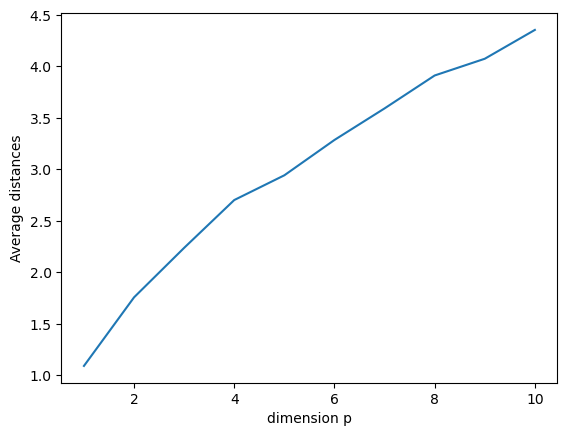

In [244]:
def distance(vec1, vec2):
    store_data = []
    """The Euclidean distance between two arrays"""
    store_data.append((vec1 - vec2)**2)
    return math.sqrt(np.sum(store_data))

n = 1000
p = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
avg_dis = []
for i in p:
    store = []
    for k in range(n):
    #i.i.d and standard normal 
        X1 = np.random.randn(i)
        X2 = np.random.randn(i)
        store.append(distance(X1, X2))
    mean_p = np.mean(store)
    avg_dis.append(mean_p)


fig = plt.figure()
plt.plot(p, avg_dis)
plt.xlabel('dimension p')
plt.ylabel('Average distances')

## Problem 3
$$
\begin{equation}
g^*(X) = 
\begin{cases}
1  & \text{if $P[Y = 1 | X = x] \ge \frac{1}{2}$}  \\
0 & \text{otherwise}
 \end{cases}
\end{equation}
$$

want to prove that this minimizes the bayes error which is:
$$
\begin{equation}
P[g(X) \neq Y | X = x]
\end{equation}
$$

It's enough to show that $P[g^*(X) \neq Y | X = x] \le P[g(X) \neq Y | X = x]$

First:

$ P[g(X) \neq Y | X = x] = 1 - P[g(X) = Y | X = x]$

since $Y$ is binary and $Y = g(X)$:

$ = 1 - (P[g(X) = 1, Y = 1 | X = x] + P[g(X) = 0, Y = 0 | X = x])$

$ = 1 - (\mathbb{1}(g(X) = 1)P[Y = 1 | X = x] + \mathbb{1}(g(X) = 0)P[Y = 0 | X = x])$

Let $P[Y = 1 | X = x] = \pi$

$ = 1 - (\mathbb{1}(g(X) = 1)\pi + \mathbb{1}(g(X) = 0)(1-\pi))$

For every $x$

$P[g(X) \neq Y | X = x] - P[g^*(X) \neq Y | X = x]$

$1 - (\mathbb{1}(g(X) = 1)\pi + \mathbb{1}(gX = 0)(1-\pi)) - (1 - (\mathbb{1}(g^*(X) = 1)\pi + \mathbb{1}(g^*(X) = 0)(1-\pi)))$

For ease of notation, let 
$\mathbb{1}(gX = 0) = \mathbb{1}_0, \mathbb{1}(gX = 1) = \mathbb{1}_1, \mathbb{1}(g^*X = 0) = \mathbb{1}^*_0, \mathbb{1}(g^*X = 1) = \mathbb{1}^*_1$

$= - (\mathbb{1}_1\pi + \mathbb{1}_0(1-\pi)) + (\mathbb{1}^*_1\pi + \mathbb{1}^*_0(1-\pi))$

$ = \pi(\mathbb{1}^*_1 - \mathbb{1}_1) + (1 -\pi)(\mathbb{1}^*_0 - \mathbb{1}_0) $

$ = \pi(\mathbb{1}^*_1 - \mathbb{1}_1) + (1 -\pi)((1- \mathbb{1}^*_1) - (1 - \mathbb{1}_1)) $

$ = \pi(\mathbb{1}^*_1 - \mathbb{1}_1) + (1 -\pi)(\mathbb{1}_1 - \mathbb{1}^*_1)) $

$ = \pi(\mathbb{1}^*_1 - \mathbb{1}_1) - (1 -\pi)(\mathbb{1}^*_1 - \mathbb{1}_1)) $

$ = (\mathbb{1}^*_1 - \mathbb{1}_1)(\pi - (1 -\pi)) $

$ = (\mathbb{1}^*_1 - \mathbb{1}_1)(2\pi - 1) $

Case 1, when $g^*(X) = 1 \text{ (and $\pi \ge \frac{1}{2})$} $:

$ = (\underbrace{1 - \underbrace{\mathbb{1}_1}_{\text{1 or 0}}}_{non-negative})
(\underbrace{2\pi  - 1}_{non-negative}) \implies \ge 0$

Case 2, when $g^*(X) = 0 \text{ (and $\pi = 0)$} $

$ = (\underbrace{0 - \underbrace{\mathbb{1}_1}_{\text{1 or 0}}}_{non-positive})
(\underbrace{2\pi  - 1}_{negative}) \implies \ge 0$

$\implies P[g(X) \neq Y | X = x] \ge P[g^*(X) \neq Y | X = x]$ /// 
